In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import scipy

In [3]:
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

# Notes

Data Driven:
Tycho Brah's extensive astronomical observation led to 
**Johannes Kepler** discovered the empirical laws of planetary motion

By generating data in this way, we are capturing a property of many real data sets, namely that they possess an underlying regularity, which we wish to learn, but that individual observations are corrupted by random noise. This noise might arise from intrinsically **stochastic** (i.e. random) pro- cesses such as radioactive decay but more typically is due to there being sources of variability that are themselves unobserved.

## 1.1

In [4]:
def f(x):
    return np.sin(2 * x * np.pi)

In [5]:
def noise(x, std=0.3):
    return x + np.random.normal(scale=std, size=x.shape)

In [7]:
X_train = np.linspace(0, 1, 10)
y_train = noise(f(X_train))

In [8]:
X_test = np.linspace(0, 1, 100)
y_test = noise(f(X_test))
f_X = f(X_test)

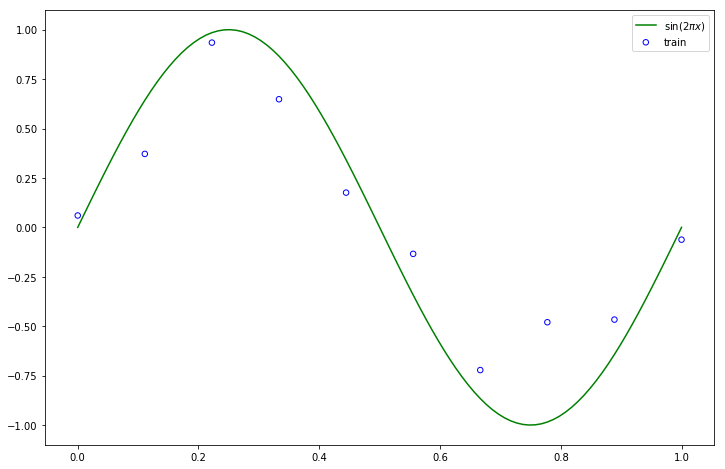

In [9]:
plt.scatter(X_train, y_train, marker='o', s=30, facecolors='none', edgecolors='b', label='train')
plt.plot(X_test, f_X, c='g', label='$\sin(2\pi x)$')
plt.legend()

### error function
* sum of squares
$$E(\boldsymbol{w})=1/2\sum_{n=1}^{N}(y(x_n,\boldsymbol{w})-t_n)^2$$

In [10]:
def E(y, t):
    return sum((y - t)**2) / 2

def Erms(y, t):
    return np.sqrt(2*E(y, t) / len(y))

### curve fitting

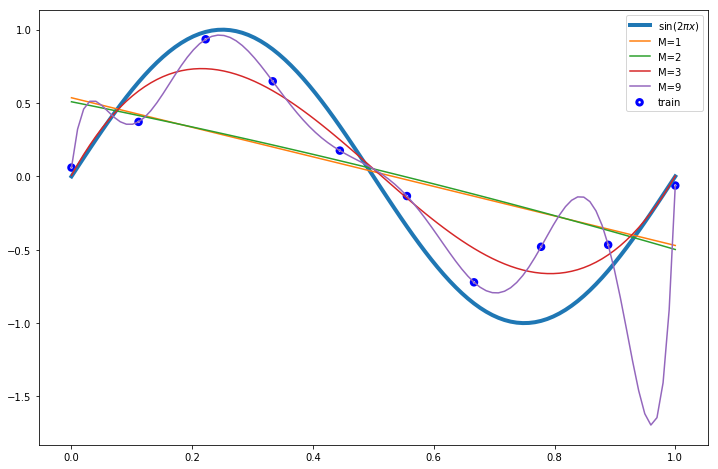

In [15]:
plt.scatter(X_train, y_train, marker='o', s=30, facecolors='none', edgecolors='b', label='train', lw=3)
plt.plot(X_test, f_X, label='$\sin(2\pi x)$', lw=4)
# plt.scatter(X_test, y_test, label='y_test')

for M in [1,2,3,9]:
    f_M = np.vectorize(np.poly1d(np.polyfit(X_train, y_train, M)))
    plt.plot(X_test, f_M(X_test), label=f'M={M}')

plt.legend()

In [33]:
e_trains = []
e_tests = []
Ms = range(0,10)
for M in Ms:
    f_M = np.vectorize(np.poly1d(np.polyfit(X_train, y_train, M)))
    e_train = Erms(f_M(X_train), y_train) 
    e_test = Erms(f_M(X_test), y_test)
    e_trains.append(e_train)
    e_tests.append(e_test)

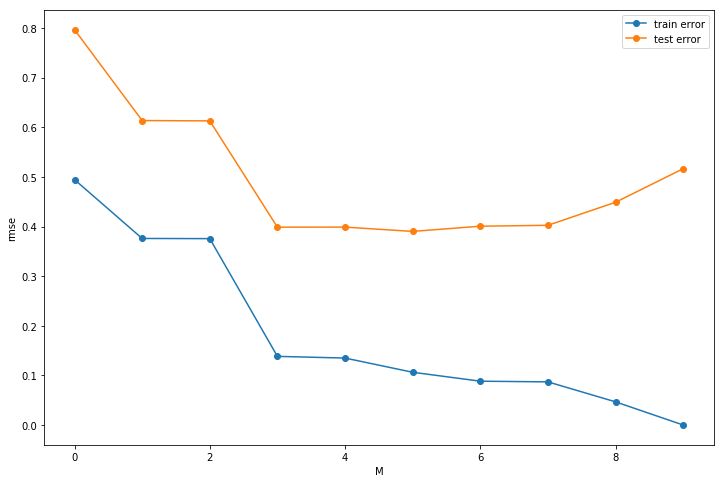

In [42]:
plt.plot(e_trains, 'o-', label='train error')
plt.plot(e_tests, 'o-', label='test error')
plt.xlabel('M')
plt.ylabel('rmse')
plt.legend()